In [3]:
import gensim
import gensim.downloader
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize # nltk.tokenize.TreebankWordTokenizer()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import re

In [2]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [14]:
nltk.download('wordnet') # for lemmatizer
nltk.download('punkt') # for tokenization
nltk.download('stopwords') # for stopwords.words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def process_text_stemmer(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

    tokens = word_tokenize(text)

    stop_words = stopwords.words('english')
    stemmer = PorterStemmer()
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    return ' '.join(cleaned_tokens)

In [5]:
def process_text_lemmer(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

    tokens = word_tokenize(text)

    stop_words = stopwords.words('english')
    lemmer = WordNetLemmatizer()
    cleaned_tokens = [lemmer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(cleaned_tokens)

In [6]:
def process_text_stemmer_and_lemmer(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()

    tokens = word_tokenize(text)

    stop_words = stopwords.words('english')
    lemmer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    cleaned_tokens = [lemmer.lemmatize(stemmer.stem(token)) for token in tokens if token not in stop_words]

    return ' '.join(cleaned_tokens)

In [7]:
review1 = "Red Hot Chili Peppers on vinyl has been a disappointing experience.. I had to return both “By The Way” and “Stadium Arcadium” because there were skips on almost all of it.. Kind of made it seem like the record label just went cheap, which is a disservice to anyone that actually listens to their vinyl...This “Greatest Hits” compilation did not have the same problems as the other two I bought. It sounded as it should have, and there were no skips."

In [12]:
processed_review1 = process_text_stemmer(review1)
processed_review1

'red hot chili pepper vinyl disappoint experi return way stadium arcadium skip almost kind made seem like record label went cheap disservic anyon actual listen vinylthi greatest hit compil problem two bought sound skip'

In [15]:
processed_review2 = process_text_lemmer(review1)
processed_review2

'red hot chili pepper vinyl disappointing experience return way stadium arcadium skip almost kind made seem like record label went cheap disservice anyone actually listens vinylthis greatest hit compilation problem two bought sounded skip'

In [16]:
processed_review3 = process_text_stemmer_and_lemmer(review1)
processed_review3

'red hot chili pepper vinyl disappoint experi return way stadium arcadium skip almost kind made seem like record label went cheap disservic anyon actual listen vinylthi greatest hit compil problem two bought sound skip'

In [17]:
unknown_words1 = set()
unknown_words2 = set()
unknown_words3 = set()

In [18]:
key_to_index = glove_vectors.key_to_index

In [20]:
def tokenize(text, key_to_index, set_number=1, unknown_token="<UNK>"):
    words = text.split()

    tokenized = []
    for word in words:
      if word in key_to_index:
        tokenized.append(key_to_index[word])
      else:
        if set_number == 1:
          unknown_words1.add(word)
        elif set_number == 2:
          unknown_words2.add(word)
        elif set_number == 3:
          unknown_words3.add(word)
        continue
            # if unknown_token in key_to_index:
            #     tokenized.append(key_to_index[unknown_token])
            # else:

    return tokenized

In [21]:
tokenized_text1 = tokenize(processed_review1, key_to_index, 1)
tokenized_text1, unknown_words1

([639,
  1627,
  14034,
  5906,
  11192,
  24044,
  498,
  179,
  1352,
  191005,
  10407,
  591,
  921,
  116,
  1914,
  117,
  384,
  3007,
  388,
  5115,
  283927,
  3570,
  4927,
  2605,
  416,
  747,
  55,
  1775,
  1507,
  10407],
 {'compil', 'disservic', 'experi', 'vinylthi'})

In [22]:
tokenized_text2 = tokenize(processed_review2, key_to_index, 2)
tokenized_text2, unknown_words2

([639,
  1627,
  14034,
  5906,
  11192,
  5407,
  1221,
  498,
  179,
  1352,
  191005,
  10407,
  591,
  921,
  116,
  1914,
  117,
  384,
  3007,
  388,
  5115,
  39961,
  1544,
  1403,
  23804,
  2605,
  416,
  7663,
  747,
  55,
  1775,
  7376,
  10407],
 {'vinylthis'})

In [23]:
tokenized_text3 = tokenize(processed_review3, key_to_index, 3)
tokenized_text3, unknown_words3

([639,
  1627,
  14034,
  5906,
  11192,
  24044,
  498,
  179,
  1352,
  191005,
  10407,
  591,
  921,
  116,
  1914,
  117,
  384,
  3007,
  388,
  5115,
  283927,
  3570,
  4927,
  2605,
  416,
  747,
  55,
  1775,
  1507,
  10407],
 {'compil', 'disservic', 'experi', 'vinylthi'})

In [24]:
key_to_index['disservice']

39961

Conclusion: just lemmatize. Do not use stemming alone or together with lemmatization

In [25]:
print(glove_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [26]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

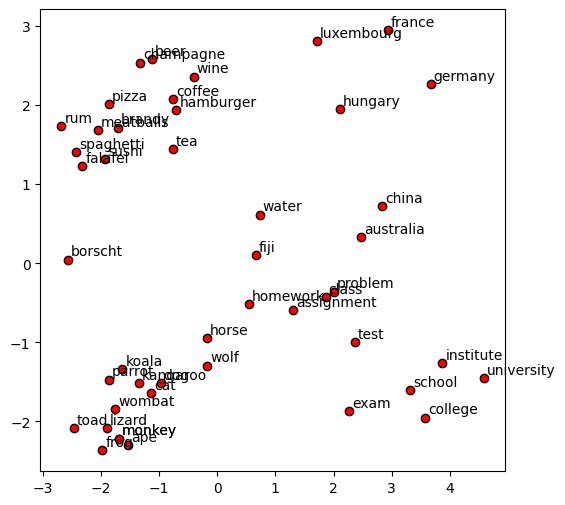

In [27]:
display_pca_scatterplot(glove_vectors,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])